In [5]:
import numpy as np
p1=np.array([1,1])
p2=np.array([4,4])
p2-p1

array([3, 3])

In [6]:
np.sqrt(np.sum(np.power(p2-p1,2)))

4.242640687119285

In [7]:
import numpy as np
def distance(p1,p2):
    """finds the distance between points p1 and p2"""
    return np.sqrt(np.sum(np.power(p2-p1,2)))

In [4]:
p1=np.array([1,1])
p2=np.array([4,4])
distance(p1,p2)

4.242640687119285

In [8]:
def majority_vote(votes):
    vote_counts={}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote]+=1
        else:
            vote_counts[vote]=1
    return vote_counts


In [12]:
votes=[1,2,3,1,2,3,1,2,3,3,3,3]
vote_counts=majority_vote(votes)
vote_counts

{1: 3, 2: 3, 3: 6}

In [13]:
max(vote_counts)

3

In [14]:
max(vote_counts.keys())

3

In [15]:
max(vote_counts.values())

6

In [16]:
max_count=max(vote_counts.values())
max_count

6

In [17]:
winners=[]
max_count=max(vote_counts.values())
for vote,count in vote_counts.items():
    #print(vote,count)
    if count==max_count:
        winners.append(vote)

In [22]:
winners

[3]

In [64]:
import random
def majority_vote(votes):
    """return the most common element in votes."""
    vote_counts={}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote]+=1
        else:
            vote_counts[vote]=1
                        
    winners=[]
    max_count=max(vote_counts.values())
    for vote,count in vote_counts.items():
        #print(vote,count)
        if count==max_count:
            winners.append(vote)        
    
    return random.choice(winners)


In [19]:
votes=[1,2,3,1,2,3,1,2,3,3,3,3]
winner=majority_vote(votes)
winner

3

In [61]:
vote_counts.items()

dict_items([(1, 3), (2, 3), (3, 6)])

In [20]:
votes=[1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
winner=majority_vote(votes)
winner

3

In [66]:
random.choice([1,2,3])

3

In [21]:
winner=majority_vote(votes)
winner

2

In [27]:
winner=majority_vote(votes)
winner

2

In [28]:
winner=majority_vote(votes)
winner

3

In [22]:
import scipy.stats as ss
def majority_vote_short(votes):
    """return the most common element in votes."""
    mode,count=ss.mstats.mode(votes)
    return mode


In [23]:
votes=[1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]


In [24]:
majority_vote_short(votes)

array([2.])

In [25]:
majority_vote_short(votes)

array([2.])

In [26]:
majority_vote_short(votes)

array([2.])

In [46]:
majority_vote_short(votes)

array([2.])

In [47]:
majority_vote_short(votes)

array([2.])

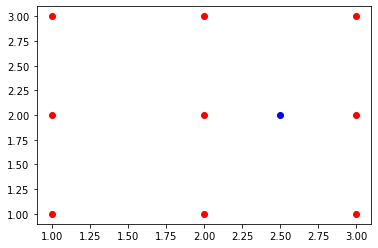

In [27]:
#loop over all points
 #compute the distance between point p and every other point
    #sort distances and return those k points that are nearest to point p
    
points=np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])  
p=np.array([2.5,2])
import matplotlib.pyplot as plt
plt.plot(points[:,0],points[:,1],"ro")
plt.plot(p[0],p[1],"bo")

(0.5, 3.5, 0.5, 3.5)

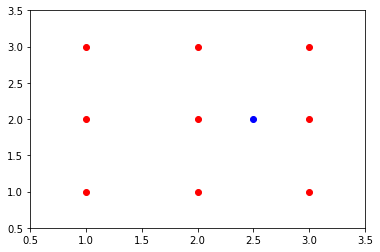

In [28]:
points=np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])  
p=np.array([2.5,2])
import matplotlib.pyplot as plt
plt.plot(points[:,0],points[:,1],"ro")
plt.plot(p[0],p[1],"bo")
plt.axis([0.5,3.5,0.5,3.5])

(0.5, 3.5, 0.5, 3.5)

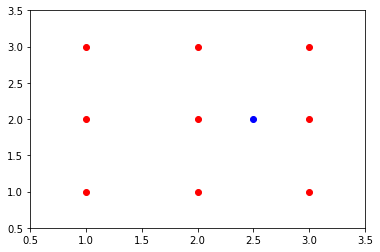

In [29]:
distances=np.zeros(points.shape[0])
for i in range(len(distances)):
    distances[i]=distance(p,points[i])
    

points=np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])  
p=np.array([2.5,2])
import matplotlib.pyplot as plt
plt.plot(points[:,0],points[:,1],"ro")
plt.plot(p[0],p[1],"bo")
plt.axis([0.5,3.5,0.5,3.5])

In [54]:
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [55]:
points[4]

array([2, 2])

In [56]:
distances[4]

0.5

In [57]:
points[7]

array([3, 2])

In [58]:
distances[7]

0.5

In [59]:
ind=np.argsort(distances)
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2], dtype=int64)

In [60]:
distances[ind]

array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

In [61]:
distances[ind[0:2]]

array([0.5, 0.5])

In [30]:
def find_nearest_neighbors(p,points,k=5):
    """find the k nearest neighbors of point p and return their indices."""

    distances=np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i]=distance(p,points[i])
        ind=np.argsort(distances)
    return ind[:k]

In [31]:
ind=find_nearest_neighbors(p,points,2);print(points[ind])

[[2 2]
 [3 2]]


In [32]:
ind=find_nearest_neighbors(p,points,3);print(points[ind])

[[2 2]
 [3 2]
 [2 1]]


In [33]:
ind=find_nearest_neighbors(p,points,4);print(points[ind])

[[2 2]
 [3 2]
 [2 1]
 [2 3]]


In [34]:
def knn_predict(p,points,outcomes,k=5):
    #find k nearest neighbors
    ind=find_nearest_neighbors(p,points,k)
    #predict the class of p based on majority vote
    return majority_vote(outcomes[ind])

In [35]:
outcomes=np.array([0,0,0,0,1,1,1,1,1])

In [36]:
len(outcomes)

9

In [74]:
knn_predict(np.array([2.5,2.7]),points,outcomes,k=2)

1

In [75]:
knn_predict(np.array([1.0,2.7]),points,outcomes,k=2)

0

In [71]:
ss.norm(0,1).rvs((5,2))

array([[-1.1623395 ,  0.94050407],
       [ 0.87798774, -0.26958413],
       [ 0.82556229, -0.76827126],
       [ 0.38967127, -1.55899511],
       [-0.39075869,  1.19711931]])

In [77]:
ss.norm(1,1).rvs((5,2))

array([[ 0.48197859,  0.6030878 ],
       [-0.79656447,  1.99010849],
       [ 0.44563824, -0.60948033],
       [ 1.63505265,  1.32133121],
       [ 0.05508004,  0.7130685 ]])

In [78]:
np.concatenate((ss.norm(0,1).rvs((5,2)),ss.norm(1,1).rvs((5,2))),axis=0)

array([[-1.45336026, -1.92366358],
       [ 1.6235752 ,  0.85901069],
       [ 1.56992286,  0.66459823],
       [-0.51485277,  0.02207864],
       [-0.70608042,  0.74510725],
       [ 1.44767781,  0.81943989],
       [ 0.88688789,  0.6594341 ],
       [-0.13559375,  0.59544624],
       [ 2.46657574,  0.3220377 ],
       [-0.75539097,  1.2733534 ]])

In [82]:
n=5
np.concatenate((np.repeat(0,n),np.repeat(1,n)))

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [38]:
def generate_synth_data(n=50):
    """create two sets of points frombivariate normal distributions."""
    points=np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)
    outcomes=np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points,outcomes)

    

In [39]:
n=20
(points,outcomes)=generate_synth_data(n)

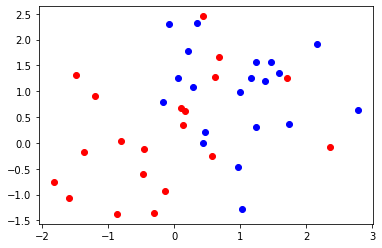

In [40]:
plt.figure()
plt.plot(points[:n,0],points[:n,1],"ro")
plt.plot(points[n:,0],points[n:,1],"bo")
plt.savefig("bivardata.pdf")

In [47]:
def make_prediction_grid(predictors,outcomes,limits,h,k):
    """ classify each point on the prediction grid."""
    
    (x_min,x_max,y_min,y_max)=limits
    xs=np.arange(x_min,x_max,h)
    ys=np.arange(y_min,y_max,h)
    xx,yy=np.meshgrid(xs,ys)
    
    prediction_grid=np.zeros(xx.shape,dtype=int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p=np.array([x,y])
            prediction_grid[j,i]=knn_predict(p,predictors,outcomes,k)
            
        return (xx,yy,prediction_grid )

In [48]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [43]:
seasons=["spring","summer","fall","winter"]

In [44]:
enumerate(seasons)

In [45]:
list(enumerate(seasons))

[(0, 'spring'), (1, 'summer'), (2, 'fall'), (3, 'winter')]

In [90]:
for ind,season in enumerate(seasons):
    print(ind,season)

0 spring
1 summer
2 fall
3 winter


In [52]:
(predictors,outcomes)=generate_synth_data()

In [68]:
predictors.shape

(100, 2)

In [54]:
outcomes.shape

(100,)

<ipython-input-48-bf3e93cec0e7>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)


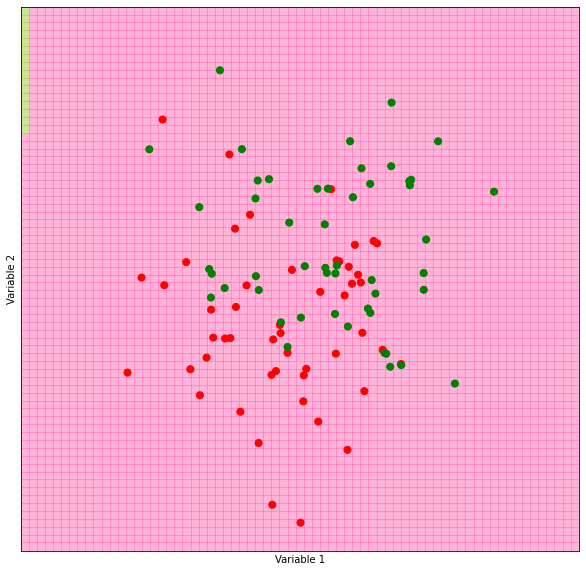

In [55]:
k=5;filename="knn_synth_5.pdf";limits=(-3,4,-3,4);h=0.1
(xx,yy,prediction_grid)=make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)

<ipython-input-48-bf3e93cec0e7>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)


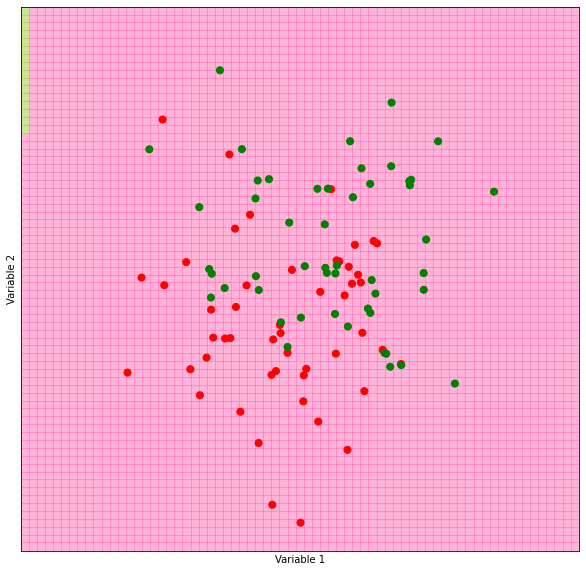

In [56]:
k=5;filename="knn_synth_50.pdf";limits=(-3,4,-3,4);h=0.1
(xx,yy,prediction_grid)=make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)

In [106]:
from sklearn import datasets
iris=datasets.load_iris()

In [107]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

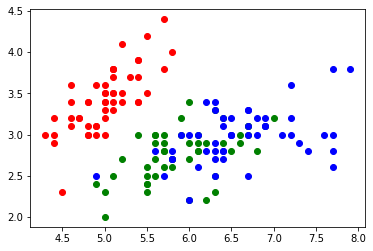

In [108]:
predictors=iris.data[:,0:2]
outcomes=iris.target
plt.plot(predictors[outcomes==0][:,0],predictors[outcomes==0][:,1],"ro")
plt.plot(predictors[outcomes==1][:,0],predictors[outcomes==1][:,1],"go")
plt.plot(predictors[outcomes==2][:,0],predictors[outcomes==2][:,1],"bo")
plt.savefig("iris.pdf")

<ipython-input-48-bf3e93cec0e7>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)


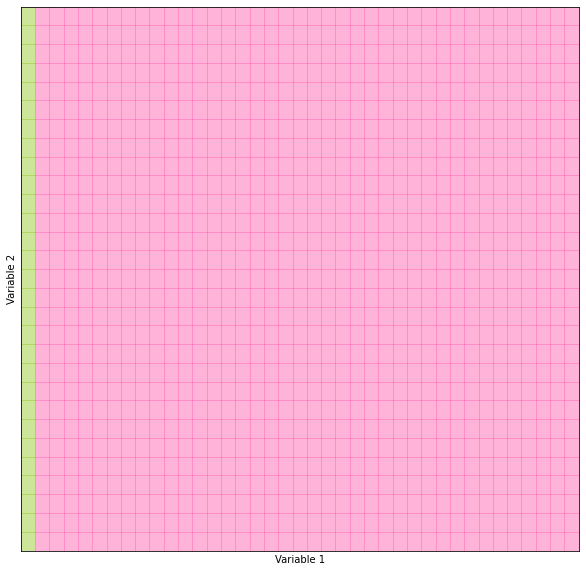

In [57]:
k=5;filename="iris_grid.pdf";limits=(4,8,1.5,4.5);h=0.1
(xx,yy,prediction_grid)=make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(predictors,outcomes)
sk_predictions=knn.predict(predictors)

In [114]:
sk_predictions.shape

(150,)

In [113]:
sk_predictions[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [116]:
my_prediction=np.array([knn_predict(p,predictors,outcomes,5) for p in predictors])
sk_predictions==my_prediction

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [117]:
np.mean(sk_predictions==my_prediction)

0.96

In [118]:
print(100*np.mean(sk_predictions==my_prediction))

96.0


In [120]:
print(100*np.mean(sk_predictions==outcomes))
print(100*np.mean(my_prediction==outcomes))

83.33333333333334
84.66666666666667


In [69]:
np.argsort([3,5,1])

array([2, 0, 1], dtype=int64)

In [75]:
np.arange(1,6,0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9])